# 1. EFFECTIVENESS OF THE ONLINE LEARNING RULE

## Setup the environment

#### Adding the source code path

In [1]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [2]:
import random

random.seed(50)

#### Import experiment data 

In [3]:
from DATA import NARMA10

data = NARMA10(True, [80,10,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

## NOT PRETRAINED RESERVOIR

In [4]:
N_UNITS = 50

In [5]:
from IPReservoir import IPReservoir
from ESN import Reservoir
from IntrinsicPlasticity import IPMask

simple_reservoir = Reservoir(N = N_UNITS, sparsity=0.2, ro_rescale=0.25, bias = True)

W_x = simple_reservoir.W_x
W_u = simple_reservoir.W_u
b_x = simple_reservoir.b_x
b_u = simple_reservoir.b_u

## PRETRANING WITH OLD STYLE INTRINSIC PLASTICITY

In [6]:
ip_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.normalMask(N_UNITS), bias = True)

ip_reservoir.W_x = W_x
ip_reservoir.W_u = W_u
ip_reservoir.b_x = b_x
ip_reservoir.b_u = b_u

In [7]:
ip_reservoir.pre_train(X_TR, eta=0.00005, epochs=15,  learning_rule="online", verbose=True) #16

- Epoch: 1) | KL Divergence value: 2202.773681640625.
- Epoch: 2) | KL Divergence value: 2026.0479736328125.
- Epoch: 3) | KL Divergence value: 1899.705078125.
- Epoch: 4) | KL Divergence value: 1814.9046630859375.
- Epoch: 5) | KL Divergence value: 1760.0135498046875.
- Epoch: 6) | KL Divergence value: 1724.957763671875.
- Epoch: 7) | KL Divergence value: 1702.6756591796875.
- Epoch: 8) | KL Divergence value: 1689.2200927734375.
- Epoch: 9) | KL Divergence value: 1682.8502197265625.
- Epoch: 10) | KL Divergence value: 1682.4947509765625.
- Epoch: 11) | KL Divergence value: 1686.9425048828125.
- Epoch: 12) | KL Divergence value: 1694.9945068359375.
- Epoch: 13) | KL Divergence value: 1705.7403564453125.
- Epoch: 14) | KL Divergence value: 1718.6204833984375.
- Epoch: 15) | KL Divergence value: 1733.3817138671875.


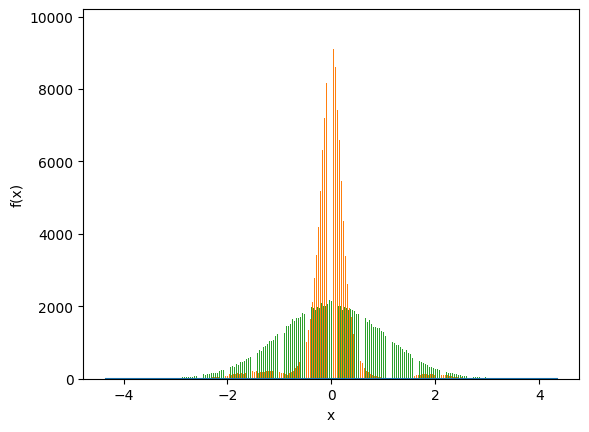

In [8]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

In [9]:
ip_reservoir.max_eigs()

tensor(0.8451)

In [10]:
ip_reservoir.rescale_weights(0.96)
ip_reservoir.max_eigs()

tensor(0.9600)

In [11]:
ip_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (2.0332374572753906)  ACTUAL_STD == (0.3221122622489929)][ TARGET_MEAN == (-0.013726780191063881) TARGET_STD == (0.9965596795082092)]
Unit - (2): [ ACTUAL_MEAN == (0.012211072258651257)  ACTUAL_STD == (0.23390769958496094)][ TARGET_MEAN == (-0.01842920295894146) TARGET_STD == (1.0226558446884155)]
Overall network: [ACTUAL_MEAN == (-0.02575800195336342)  ACTUAL_STD == (0.48571932315826416)]


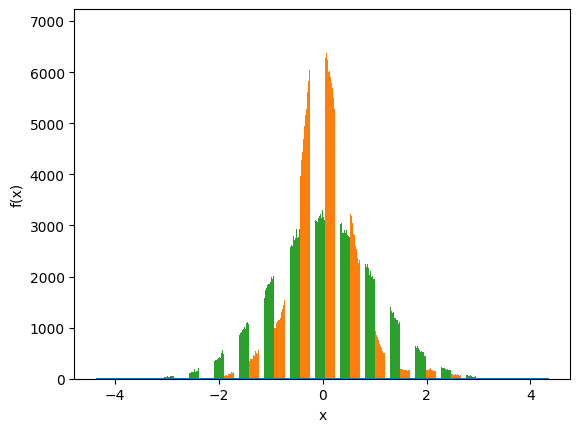

In [12]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

## BIMODAL MIXTURE OF GAUSSIAN

In [13]:
# It seems that switching the "old" bias terms down (input bias and recurrent weights bias), 
# helps the algorithm converging earlier, letting the IP bias dominate the linear translation. 

bimodal_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.mixedBimodalMask(N_UNITS), bias = False)

bimodal_reservoir.W_x = W_x
bimodal_reservoir.W_u = W_u
#bimodal_reservoir.b_x = b_x
#bimodal_reservoir.b_u = b_u

In [14]:
bimodal_reservoir.pre_train(X_TR, eta= 0.0000025, epochs=15,  learning_rule="online", verbose=True)

- Epoch: 1) | KL Divergence value: 3404.34765625.
- Epoch: 2) | KL Divergence value: 3141.67236328125.
- Epoch: 3) | KL Divergence value: 2900.929443359375.
- Epoch: 4) | KL Divergence value: 2683.748046875.
- Epoch: 5) | KL Divergence value: 2490.72216796875.
- Epoch: 6) | KL Divergence value: 2321.55419921875.
- Epoch: 7) | KL Divergence value: 2175.27490234375.
- Epoch: 8) | KL Divergence value: 2050.447265625.
- Epoch: 9) | KL Divergence value: 1945.4432373046875.
- Epoch: 10) | KL Divergence value: 1858.606689453125.
- Epoch: 11) | KL Divergence value: 1788.43017578125.
- Epoch: 12) | KL Divergence value: 1733.6331787109375.
- Epoch: 13) | KL Divergence value: 1693.220947265625.
- Epoch: 14) | KL Divergence value: 1666.6119384765625.
- Epoch: 15) | KL Divergence value: 1653.845703125.


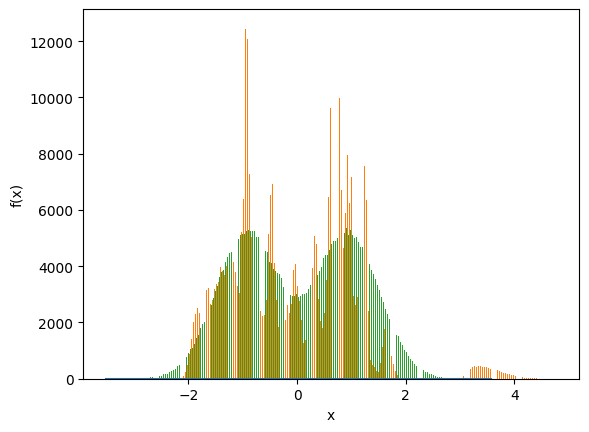

In [15]:
bimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

In [16]:
bimodal_reservoir.max_eigs()

tensor(0.4199)

In [17]:
ip_reservoir.rescale_weights(0.96)
ip_reservoir.max_eigs()

tensor(0.9600)

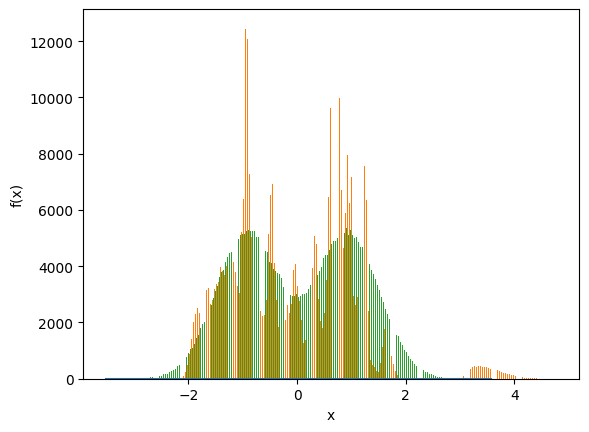

In [18]:
bimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

In [19]:
bimodal_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (-0.8295278549194336)  ACTUAL_STD == (0.12744149565696716)][ TARGET_MEAN == (-0.9210667014122009) TARGET_STD == (0.5778183937072754)]
Unit - (2): [ ACTUAL_MEAN == (0.9426762461662292)  ACTUAL_STD == (0.04397329315543175)][ TARGET_MEAN == (0.9165403246879578) TARGET_STD == (0.5850493311882019)]
Overall network: [ACTUAL_MEAN == (-0.02601804956793785)  ACTUAL_STD == (1.0970184803009033)]


## EVAUALTUION IN ESN

In [20]:
from ESN import EchoStateNetwork

simple_esn = EchoStateNetwork(simple_reservoir)
ip_esn = EchoStateNetwork(ip_reservoir)
bimodal_esn = EchoStateNetwork(bimodal_reservoir)

simple_esn.reservoir.reset_initial_state()
ip_esn.reservoir.reset_initial_state()
bimodal_esn.reservoir.reset_initial_state()

simple_esn.reservoir.warm_up(X_TR[0:100])
ip_esn.reservoir.warm_up(X_TR[0:100])
bimodal_esn.reservoir.warm_up(X_TR[0:100])

simple_esn.train(X_TR[100:None], Y_TR[100:None], 0)
ip_esn.train(X_TR[100:None], Y_TR[100:None], 0)
bimodal_esn.train(X_TR[100:None], Y_TR[100:None], 0)


Reservoir warmed up with the first 100 time steps


Reservoir warmed up with the first 100 time steps
Reservoir warmed up with the first 100 time steps


array([0.26519775, 0.23379517, 0.25112915, ..., 0.28829956, 0.25350952,
       0.25534058], dtype=float32)

### COMPARISON ON TEST DATA

In [21]:
from Metrics import NRMSE, MSE

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.021310197135037907


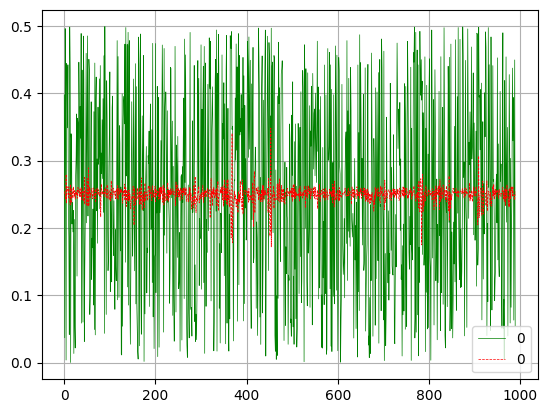

In [22]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { simple_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.021122658250735338


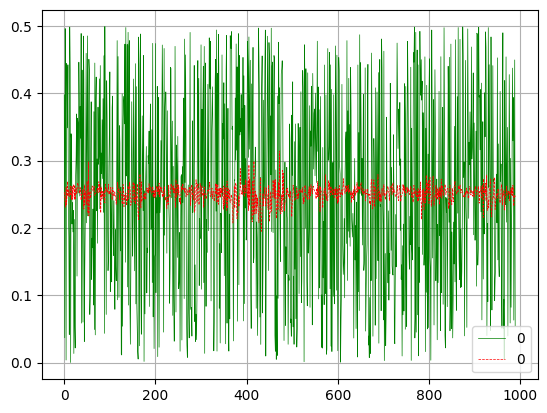

In [23]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { ip_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.02125947732158929


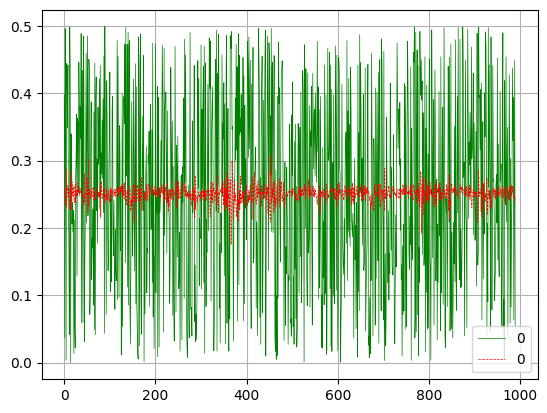

In [24]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { bimodal_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )

## LYAPUNOV EXPONENTS

In [25]:
simple_esn.reservoir.LCE(X_TS)

-3.5248382

In [26]:
ip_esn.reservoir.LCE(X_TS)

-2.9505506

In [27]:
bimodal_esn.reservoir.LCE(X_TS)

-1.4904588

## MEMORY CAPACITY

In [28]:
def mean_mc(esn: EchoStateNetwork, rep):
    mc = 0
    for _ in range(rep):
        mc += esn.MemoryCapacity()

    return mc/rep

In [29]:
mean_mc(simple_esn, 5)

tensor(5.7749)

In [30]:
mean_mc(ip_esn, 5)

tensor(10.0682)

In [31]:
mean_mc(bimodal_esn, 5)

C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.7076e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.6494e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.5412e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local

tensor(7.7768)

## DEVIATION FROM LINEARITY

In [32]:
simple_esn.reservoir.de_fi()

0.10391181043372061

In [33]:
ip_esn.reservoir.de_fi()

0.19910503313583047

In [34]:
bimodal_esn.reservoir.de_fi()

0.06905670898619055